# Global Power Plant Database Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("database_IND.csv")

In [4]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [6]:
df.sample()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
662,IND,India,Ram Tirath Jaga Solar Power Plant,WRI1026191,10.0,29.9619,75.1631,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [8]:
df.corr()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
capacity_mw,1.000000,0.050107,0.198377,NaN,0.294661,NaN,NaN,0.823513,0.850698,0.855834,0.881209,0.896785,NaN
latitude,0.050107,1.000000,0.031501,NaN,0.120944,NaN,NaN,0.050720,0.059826,0.048103,0.040832,0.039711,NaN
longitude,0.198377,0.031501,1.000000,NaN,0.114167,NaN,NaN,0.017461,0.013678,0.023087,0.051128,0.049320,NaN
other_fuel3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,0.294661,0.120944,0.114167,NaN,1.000000,NaN,NaN,0.137351,0.160896,0.171964,0.195301,0.193421,NaN
wepp_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2013,0.823513,0.050720,0.017461,NaN,0.137351,NaN,NaN,1.000000,0.968904,0.908396,0.894752,0.859459,NaN
generation_gwh_2014,0.850698,0.059826,0.013678,NaN,0.160896,NaN,NaN,0.968904,1.000000,0.961105,0.937091,0.912585,NaN
generation_gwh_2015,0.855834,0.048103,0.023087,NaN,0.171964,NaN,NaN,0.908396,0.961105,1.000000,0.974955,0.940274,NaN


In [9]:
df.shape

(908, 25)

In [10]:
df.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [12]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [14]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [15]:
df['country'].value_counts()

IND    908
Name: country, dtype: int64

In [16]:
df['country_long'].value_counts()

India    908
Name: country_long, dtype: int64

In [17]:
df['name'].value_counts()

NAGPUR SPONGE IRON                    1
VEMAGIRI CCCP                         1
BSES Kerala CCGT                      1
MSPL Wind Farm                        1
Khirsara - Unity Solar Power Plant    1
                                     ..
BARSINGAR LIGNITE                     1
SURAT LIG.                            1
BHADRA                                1
RSMNL Wind Farm                       1
PARLI                                 1
Name: name, Length: 908, dtype: int64

In [18]:
df['gppd_idnr'].value_counts()

IND0000133    1
IND0000203    1
IND0000262    1
IND0000028    1
IND0000053    1
             ..
IND0000460    1
IND0000191    1
WRI1026113    1
WRI1019997    1
WRI1026677    1
Name: gppd_idnr, Length: 908, dtype: int64

In [19]:
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
26.4       1
68.8       1
91.8       1
1.8        1
816.4      1
Name: capacity_mw, Length: 365, dtype: int64

In [20]:
df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [21]:
df['owner'].value_counts()

Sterling Agro Industries ltd.                            4
Jk Cement ltd                                            4
Acc Acc ltd                                              4
Shree Sugars ltd                                         3
Maharashtra State Power Generation Co Ltd (MAHAGENCO)    3
                                                        ..
Precious Energy Services Pvt Ltd                         1
Firestone Trading Private Limited                        1
DDE Renewable Energy Private Limited (DREPL)             1
Precision Technik Private Limited                        1
Greta Energy ltd                                         1
Name: owner, Length: 280, dtype: int64

In [22]:
df['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [23]:
df.corr()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
capacity_mw,1.000000,0.050107,0.198377,NaN,0.294661,NaN,NaN,0.823513,0.850698,0.855834,0.881209,0.896785,NaN
latitude,0.050107,1.000000,0.031501,NaN,0.120944,NaN,NaN,0.050720,0.059826,0.048103,0.040832,0.039711,NaN
longitude,0.198377,0.031501,1.000000,NaN,0.114167,NaN,NaN,0.017461,0.013678,0.023087,0.051128,0.049320,NaN
other_fuel3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,0.294661,0.120944,0.114167,NaN,1.000000,NaN,NaN,0.137351,0.160896,0.171964,0.195301,0.193421,NaN
wepp_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2013,0.823513,0.050720,0.017461,NaN,0.137351,NaN,NaN,1.000000,0.968904,0.908396,0.894752,0.859459,NaN
generation_gwh_2014,0.850698,0.059826,0.013678,NaN,0.160896,NaN,NaN,0.968904,1.000000,0.961105,0.937091,0.912585,NaN
generation_gwh_2015,0.855834,0.048103,0.023087,NaN,0.171964,NaN,NaN,0.908396,0.961105,1.000000,0.974955,0.940274,NaN


<AxesSubplot:>

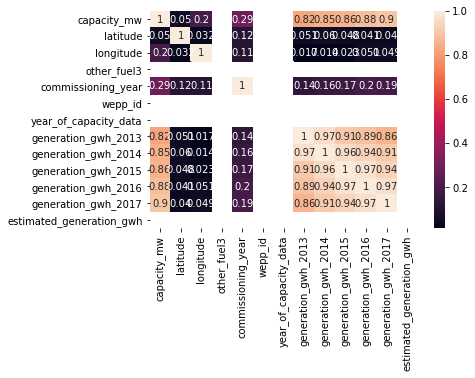

In [24]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='capacity_mw', ylabel='count'>

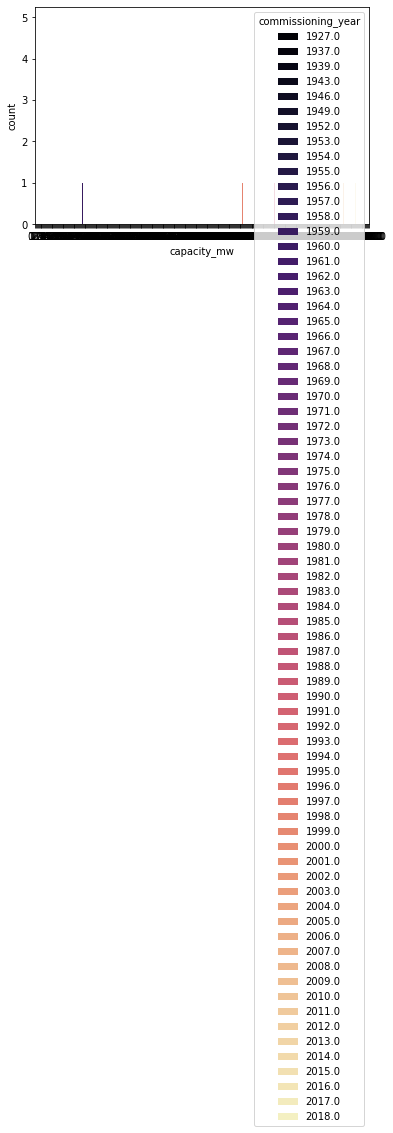

In [31]:
sns.countplot(df['capacity_mw'],hue='commissioning_year',data=df,palette='magma')

In [32]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [33]:
df1=df.copy()
df1=df1.apply(LabelEncoder().fit_transform)
df1.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,0,0,0,658,9,730,143,6,3,1,...,1,0,1,364,374,398,405,410,1,0
1,0,0,1,520,180,593,234,1,3,1,...,2,0,1,364,374,398,405,410,1,0
2,0,0,2,854,122,420,8,7,3,1,...,2,0,1,364,374,398,405,410,1,0
3,0,0,3,0,204,546,807,2,3,1,...,2,0,0,158,157,198,199,178,0,0
4,0,0,4,1,345,423,703,1,2,1,...,2,0,0,228,274,350,361,340,0,0
